# Math 475: PPGR_P
#### Justin Butler
#### October 2017

## Section 1: The PPGR_P Graph
Here I will have the code for setting up the US Population data and then code out the PPGR_P Graph. Answers to the required questions will be left for later markdown cells.

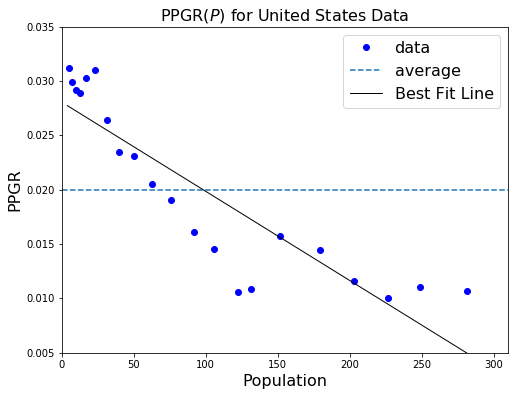

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#-------------------------------------------------------------
# Read and scale US Population Data. This code was provided.
#-------------------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

#------------------------------------------------------------------------
# Caluculate the PPGR values and plot an average and best fit line.
#------------------------------------------------------------------------
""" 
I will be using a centered difference approach to calculating PPGR. As such, my data set will have one less data point than
the graph on the handout. The graph will also be scaled slightly differently to match this difference in values.
"""

#Declare the array to store my PPGR values
M = N-2 #number of data points - since the two end points aren't between two points
PPGR = np.zeros([M])

#This for loop will find the PPGR between any two points with one point between them.
for k in range(21):
    PPGR[k] =  (1/USPop[k+1])*((USPop[k+2]-USPop[k])/(USYears[k+2]-USYears[k]))
    k = k+1

#Caluculate the average of all of the values just generated
avgPPGR = np.average(PPGR)

#Time to start making the best fit line. First we will use np.polyfit to find the slope and y-intercept of the line
USPopLineCoef = np.polyfit(USPop[1:N-1],PPGR,1)

#If something seems weird, uncomment the next line to view the line coefficients
#print (USPopLineCoef)

#Next, I will use the values of USPop as my x-values for a function of the best fit line
USPopLine = USPopLineCoef[0]*USPop + USPopLineCoef[1]

#PPGR graph:
plt.figure(figsize=(8,6))
#
#PPGR Points
plt.plot(USPop[1:N-1], PPGR, 'o', color='b', label='data')
#Average PPGR value
plt.plot([0,310],[avgPPGR,avgPPGR], linestyle='--', label='average')
#Best fit line
plt.plot(USPop,USPopLine,color='k', linewidth=1, label='Best Fit Line')
plt.ylabel('PPGR', fontsize=16)
plt.xlabel('Population', fontsize=16)
plt.title('PPGR($P$) for United States Data', fontsize=16)
plt.legend(loc=1, fontsize=16)
plt.xlim([0, 310])
plt.ylim([0.005,0.035])
plt.show()
plt.close()

### Answers to Questions:
##### 1) Give any formulas you used to calculate PPGR and explain why you used them.
In order to calculate PPGR, I used the following centered difference formula:
$$x'(t)\approx \frac{x(t+h)-x(t-h)}{2h}$$
What this formula returns is the rate of increase between two points that have a point between them. I used this formula because I felt it would minimize some of the errors that may arise in using a forward or backward method. Although I do have one less point than those two methods, the values I obtain should be more accurate to the actual growth tendencies.
##### 2) Explain how you calculated the best fit line.  Give both the NumPy procedure and the formal name of this type of a mathematical procedure.  Explain the basics of how it works.  E.g. if you are trying to maximize or minimize something, tell me what that is and tell me why you want to maximize or minimize it in the procedure.
I will first describe the process that I calculated the best fit line and then I will describe why and how one is able to do so.

The NumPy procedure for solving this type of problem uses the 'polyfit' protocol. What this does is it calculates the slope and y-intercept of a line that most accurately goes through the points. Mathematically, although the computer uses matrices, I can better describe the process of minimization through the use of derivitives. First, from the graph above, observe the right most point and it's position relative to the best fit line. If that point had the coordinates $(x_i,y_i)$ then the vertical distance from that point to the best fit line (supposing the best fit line were a linear function of the form $y=ax+b$) would be:
$$\textrm{Distance }=y_i - (ax_i+b)$$
Since there will invariably be terms both above and below the best fit line, we will want those distances to all be positive. There are two ways to do this - either use the absolute value, or square the values. We will be squaring the values. Thus, applying the previous formula to all points we would obtain the following formula:
$$\textrm{Sum of distances } = \sum_{i=0}^{N-1}(y_i-ax_i-b)^2$$

\smallskip
This is what is called the sum of the squared residuals. We want to minimize this value, because in so doing we will find the linear function that most closely matches up with the data. To do so we will look at the problem from a a linear algebra perspective. Indeed, we want the following equality to hold for all $i=0,1,\ldots,N-1$:
$$y_i=ax_i+B$$
As can be seen, by the number of parameters versus the number of variables, this is an overdetermined system of equations. Theoretically we want:

$$
\begin{bmatrix} 
1 & x_0\\
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_{N-1}\\
\end{bmatrix}  
\begin{bmatrix} 
a\\
b 
\end{bmatrix}
=
\begin{bmatrix}
y_0\\
y_1\\
y_2\\
\vdots\\
y_{N-1}
\end{bmatrix}
$$

$$ M \vec{r} = \vec{y}$$

But, since this is an overdetermined system, this has no solutions. We can, however, multiply both sides by the transverse of $M$, and solve from there in the following fashion:
$$M^TM\vec{r}=M^T\vec{y}$$
$$(M^TM)^{-1}M^TM\vec{r}=(M^TM)^{-1}M^T\vec{y}$$
$$\vec{r}=(M^TM)^{-1}M^T\vec{y}$$
And this equation is solvable. In fact, this solution will minimize the sum of the squared errors.
##### 3)What should the graph of PPGR vs. P look like if the Gompertz model is a good model for the data?  Do you think that your graph indicates that the Gompertz model is a good model for the United States population data?
The graph of PPGR vs. P should look like all of the points can be easily be connected together to create a line. The closer those points approximate to a line, the closer your model is. Looking at the graph, I would say that the Gompertz seems to be a moderately good model of the data.

##### 4)Describe how you find parameters L and r in the logistic model and r in the exponential model from the data you used in creating the PPGR vs. P graph. What values did you get for these parameters? 
Finding 'r' in the exponential model was just a matter of averaging the values of PPGR in the graph above. In the code I use the np.average command in order to find the average of all the terms in the PPGR array. I then use that for the 'r' value in the exponential model.

For the logistic model, I find 'r' in a slightly different way. In the logistic model, I know that as $P\to 0, PPGR\to r$ and as $P\to L, PPGR\to 0$. Using point-slope form I arrive at the following equation:
$$PPGR-r=-\left(\frac{r}{L}\right)(P-0)$$
See the documentation in the code for more.

As for the L value, I am completely unsure how to calculate it. I think possibly a polyfit (as with slope and y-intercept before) but I don't know what to take in for values or how to interpret the results.

##### 5)What did you choose for P_0 = P(0) in these models? Why did you pick it?
I chose $P_0$ to be the year 1900. I chose this number because it is right in the middle of the data set. I chose it for just that reason, I want the model to be in the middle of the data - so what better point than right in the middle of the data.

##### 6)Make a graph with the exponential and logistic models and United States population data using the parameters you find from the PPGR vs. P graph, and the P_0 value you selected.  
The graphs are in the following code cell:

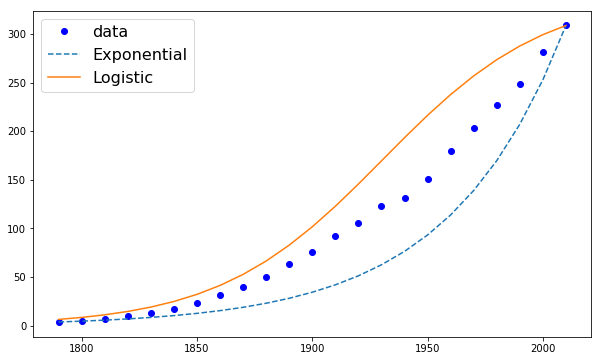

342.042727764
0.0280572385786


In [40]:
#-------------------------------------
#I first have to re-declare everything:
#-------------------------------------

%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
# Read and scale US Population Data.
#--------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

#------------------------------------------------------------------------
# Caluculate the PPGR values and plot an average and best fit line.
#------------------------------------------------------------------------
""" 
I will be using a centered difference approach to calculating PPGR. As such, my data set will have one less data point than
the graph on the handout. The graph will also be scaled slightly differently to match this difference in values.
"""

#Declare the array to store my PPGR values
M = N-2 #number of data points - since the two end points aren't between two points
PPGR = np.zeros([M])

#This for loop will find the PPGR between any two points with one point between them.
for k in range(21):
    PPGR[k] =  (1/USPop[k+1])*((USPop[k+2]-USPop[k])/(USYears[k+2]-USYears[k]))
    k = k+1

#Caluculate the average of all of the values just generated
avgPPGR = np.average(PPGR)

#Time to start making the best fit line. First we will use np.polyfit to find the slope and y-intercept of the line
USPopLineCoef = np.polyfit(USPop[1:N-1],PPGR,1)

#If something seems weird, uncomment the next line to view the line coefficients
#print (USPopLineCoef)

#Next, I will use the values of USPop as my x-values for a function of the best fit line
USPopLine = USPopLineCoef[0]*USPop + USPopLineCoef[1]

"""
-------------------------------------
THIS IS WHERE THE NEW CODE STARTS!
-------------------------------------
"""

#------------------------------------------------------------------------------------------
# With that out of the way, time to make the graphs!
#------------------------------------------------------------------------------------------

#Exponential model
def US_exp(t,P0,r):
    P = P0*np.exp(r*t)
    return P

#Calculating L and r for logistic model
L0 = (-USPopLineCoef[1])/USPopLineCoef[0]
rl = USPopLineCoef[1]

#Logistic Model
def US_log(t,P0):
    A = ((L0-P0)/P0)
    T = L0
    B = 1 + A*np.exp(-rl*t)
    return T/B
              
#Gompertz Model: Commented out for this assignment
#def US_Gomp(t,P0,L):
#    r = avgPPGR/(-(P0/L)+1)
#    log = np.log(L/P0)
#    exp = -log*np.exp(-r*t)
#    return L*np.exp(exp)

#I will next set a value for the limit of growth in the US. At present, this value is arbitrary.
#I am unsure how to adequately calculate this value. Looking 

years = np.zeros([N], dtype=int)
i = 0
for i in range(23):
    years[i] = USYears[i]-2010

plt.figure(figsize=(10,6))
#
#First, the data
plt.plot(USYears, USPop, 'o', color='b', label='data')
#Next, the possible exponential function
plt.plot(USYears, US_exp(USYears-2010,USPop[22],np.average(PPGR)), label='Exponential', linestyle='--')
#A possible logistic model
plt.plot(USYears, US_log(years,USPop[22]), label = 'Logistic')
#and finally a possible Gompertz model: Again, commented out for this assignment
#plt.plot(USYears, US_Gomp(USYears-1900,USPop[11],L), label = 'Gompertz')
plt.legend(loc=2, fontsize=16)
plt.show()
plt.close()